Accuracy on Testing Set: 98.48%
Predicted Fault Status: 0


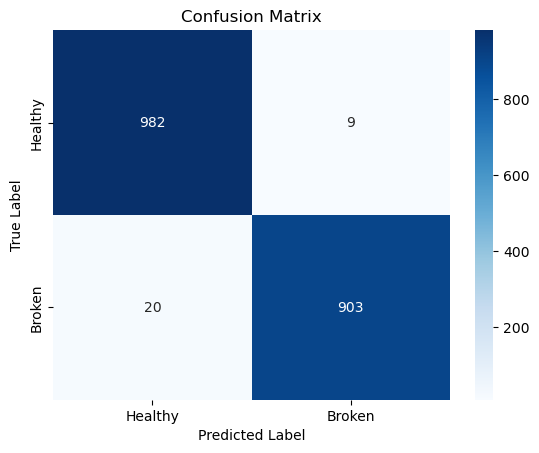

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the processed dataset
data = pd.read_csv("C:\Users\DELL\Desktop\imag\\Processed_final_data.csv")

# Define selected features and threshold
selected_features = ['S1_F3', 'S1_F4', 'S1_F9', 'S1_F10', 'S1_F11', 'S1_F13', 'S2_F7', 'S2_F8', 'S2_F9', 'S2_F10']
threshold = 0

# Convert 'Fault' into binary categorical variable based on the threshold
data['Fault'] = np.where(data['Fault'] > threshold, 1, 0)

# Extract selected features and target variable
selected_data = data[['Fault'] + selected_features]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(selected_data[selected_features], selected_data['Fault'], test_size=0.33, random_state=42)

# Train Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_rf.fit(X_train, y_train)

# Evaluate the accuracy on the testing set
y_pred = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Testing Set: {:.2f}%".format(accuracy * 100))

# Function to take user input and make predictions
def predict_fault_status(user_input, trained_model, feature_columns):
    user_data = pd.DataFrame([user_input], columns=feature_columns)
    user_prediction = trained_model.predict(user_data)
    return user_prediction[0]

# Assuming you want to take user input and make a prediction interactively
user_input_values = []
for feature in selected_features:
    user_input = float(input(f"Enter value for {feature}: "))
    user_input_values.append(user_input)

# Make prediction using user input
prediction = predict_fault_status(user_input_values, clf_rf, selected_features)

# Print the prediction
print("Predicted Fault Status: {}".format(prediction))

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=np.array(["Healthy", "Broken"]), title='Confusion Matrix')
plt.show()
